In [1]:
cd ./data

c:\Users\Admin\Desktop\数字技术创新的价值——基于并购视角和机器学习方法的分析\dat
> a



Two-sample t test with equal variances
------------------------------------------------------------------------------
   Group |     Obs        Mean    Std. err.   Std. dev.   [95% conf. interval]
---------+--------------------------------------------------------------------
       0 |   3,675    .0462857       .0023    .1394301    .0417763    .0507951
       1 |     546    .0758335    .0069167      .16162    .0622468    .0894201
---------+--------------------------------------------------------------------
Combined |   4,221    .0501078    .0021983    .1428189    .0457981    .0544175
---------+--------------------------------------------------------------------
    diff |           -.0295478    .0065354               -.0423605    -.016735
------------------------------------------------------------------------------
    diff = mean(0) - mean(1)                                      t =  -4.5212
H0: diff = 0                                     Degrees of freedom =     4219

    Ha: dif

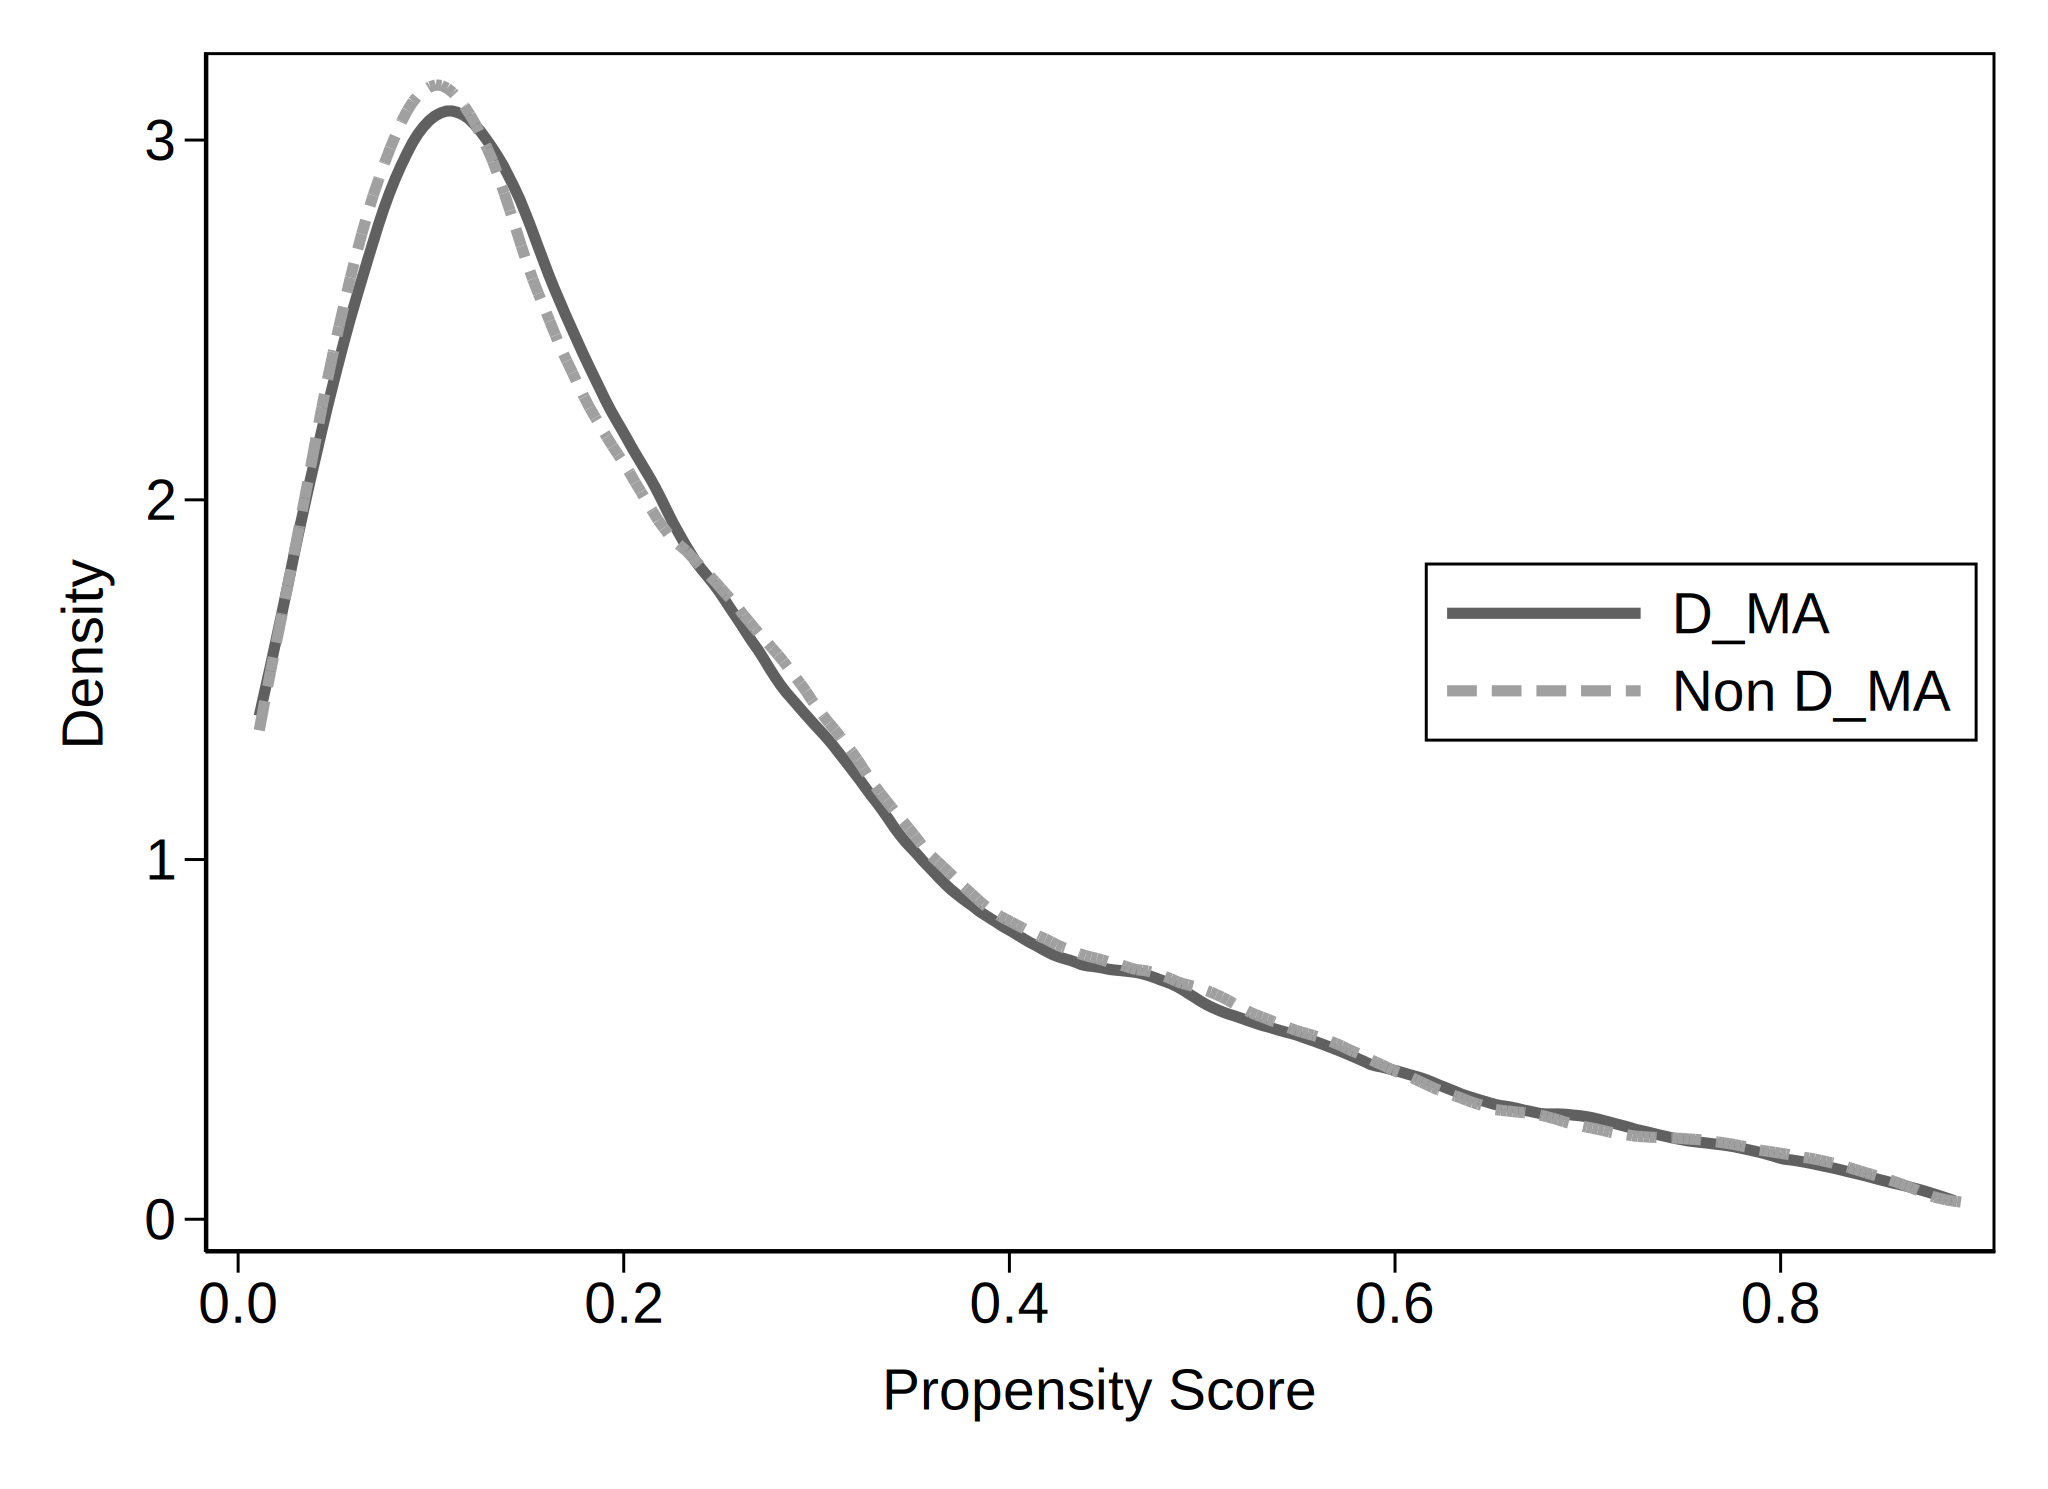

In [2]:
use 数据1,clear

**** 表4
winsor2 MKT Lev Cashflow Growth Indep Age R_D Acq_Patent Dealval DPatent Tar_Patent CAR,replace cut(1 99)

global CTR MKT Age Lev Cashflow Growth Dealval Relevance MajorMA Indep Acq_Patent Tar_Patent R_D

eststo clear
qui eststo : reg CAR D_MA $CTR i.year i.ind2,r
ttest CAR if _est_est1==1, by(D_MA)


**** 表5
eststo clear
qui eststo : reg CAR DPatent,r
qui eststo : reg CAR DPatent $CTR ,r
qui eststo : reg CAR DPatent $CTR i.year i.ind2,r

esttab,r2 indicate("Year=*year*" "Industry=*ind*" )  star(* 0.1 ** 0.05 *** 0.01) nogap compress
esttab est* using "Results.docx", rtf append star(* 0.1 ** 0.05 *** 0.01) b(%6.3f) t(%6.3f)  nogap compress ar2(%6.3f) indicate( " Year= *year*" "Industry=*ind*") title("Table 5")


**** 表7
eststo clear

qui eststo : reg CAR C.DPatent##c.HIPP $CTR i.year i.ind2,r
qui eststo : reg CAR C.DPatent##c.HF $CTR i.year i.ind2,r
qui eststo : reg CAR c.DPatent##c.CTO $CTR i.year i.ind2,r

esttab , ar2 indicate(" Year= *year*" "Industry=*ind*")  star(* 0.1 ** 0.05 *** 0.01) nogap compress
esttab est* using "Results.docx", rtf append star(* 0.1 ** 0.05 *** 0.01) b(%6.3f) t(%6.3f)  nogap compress ar2(%6.3f) indicate( " Year= *year*" "Industry=*ind*") title("Table 7")


**** 表8
global CATA AI Cloud Security Big_Data Commu_Network E_Chip

eststo clear

qui eststo : reg CAR $CATA $CTR i.year i.ind2,r

*机械设备
qui eststo : reg CAR $CATA $CTR i.year i.ind2 if tmanu==1  ,r

*轻工业
qui eststo : reg CAR $CATA $CTR i.year i.ind2 if smanu==1  ,r

*化工能源
qui eststo : reg CAR $CATA $CTR i.year i.ind2 if tchem==1 ,r

*信息技术制造业
qui eststo : reg CAR $CATA $CTR i.year i.ind2 if dmanu==1 ,r

*信息技术服务业
qui eststo : reg CAR $CATA $CTR i.year i.ind2 if dserv==1,r

esttab , ar2 indicate(" Year= *year*" "Industry=*ind*")  star(* 0.1 ** 0.05 *** 0.01) nogap compress
esttab est* using "Results.docx", rtf append star(* 0.1 ** 0.05 *** 0.01) b(%6.3f) t(%6.3f)  nogap compress ar2(%6.3f) indicate( " Year= *year*" "Industry=*ind*") title("Table 8")


**** 表6
use 数据2.dta,clear

winsor2 MKT Age Lev Cashflow Growth Indep Acq_Patent Tar_Patent R_D B_Model Acq_DPatent *TFP* DPatent,replace cut(1 99)

global CTR MKT Age Lev Cashflow Growth Indep Acq_Patent Tar_Patent R_D 
global CTR2 MKT Age Lev Cashflow Growth Indep Tar_Patent R_D 

gen deltayear = year-syear
drop if deltayear>2 //删除并购跨度大于两年

keep if rank==1 //保留每年第一个并购事件

****
eststo clear

qui eststo: reg TFP_OP DPatent $CTR i.year i.ind2, r

qui eststo: reg Acq_DPatent DPatent $CTR2 i.year i.ind2, r

qui eststo: reg B_Model DPatent $CTR i.year i.ind2, r

esttab,r2 indicate("Year=*year*" "Industry=*ind*" )  star(* 0.1 ** 0.05 *** 0.01) nogap compress
esttab est* using "Results.docx", rtf append star(* 0.1 ** 0.05 *** 0.01) b(%6.3f) t(%6.3f)  nogap compress ar2(%6.3f) indicate( " Year= *year*" "Industry=*ind*") title("Table 6")


*=====================================
*------------- 附件表格 --------------
*=====================================

**** 附表6
use 数据1,clear

winsor2 MKT Age Lev Cashflow Growth Dealval Relevance Indep Acq_Patent R_D *CAR* DPatent* Tar_Patent* *ROA* *eps* DPAT_rate DPatentN ,replace cut(1 99)

global CTR MKT Age Lev Cashflow Growth Dealval Relevance MajorMA Indep Acq_Patent Tar_Patent R_D

eststo clear
qui eststo : reg CAR D_MA $CTR i.year i.ind2,r

*描述性统计
sum2docx CAR DPatentN DPatent DPatent_w $CTR using "Summary Statistics.docx" if  _est_est1==1, replace stats(N mean(%9.4f) sd(%9.4f) min(%9.4f) p25(%9.4f) median(%9.4f) p75(%9.4f) max(%9.4f)) title("Table：Summary statistics")

sum2docx CAR DPatentN DPatent DPatent_w $CTR using "Summary Statistics.docx" if  _est_est1==1 & D_MA==1, append stats(N mean(%9.4f) sd(%9.4f) min(%9.4f) p25(%9.4f) median(%9.4f) p75(%9.4f) max(%9.4f)) title("Table：Summary statistics")


**** 附表7
eststo clear
qui eststo : reg CAR DPatent,r
qui eststo : reg CAR DPatent $CTR ,r
qui eststo : reg CAR DPatent $CTR i.year i.ind2,r

esttab,r2 indicate("Year=*year*" "Industry=*ind*" )  star(* 0.1 ** 0.05 *** 0.01) nogap compress
esttab est* using "Results.docx", rtf append star(* 0.1 ** 0.05 *** 0.01) b(%6.3f) t(%6.3f)  nogap compress ar2(%6.3f) indicate( " Year= *year*" "Industry=*ind*") title("ATable 7")


**** 附表8 第1-5列

eststo clear
eststo: reg CAR5 DPatent $CTR i.year i.ind2,r 
eststo: reg CAR10 DPatent $CTR i.year i.ind2,r  
eststo: reg CAR60 DPatent $CTR i.year i.ind2,r 
eststo: reg CAR90 DPatent $CTR i.year i.ind2,r 
eststo: reg CAR180 DPatent $CTR i.year i.ind2,r 

esttab,r2 indicate("Year=*year*" "Industry=*ind*")  star(* 0.1 ** 0.05 *** 0.01) nogap compress
esttab est* using "Results.docx", rtf append star(* 0.1 ** 0.05 *** 0.01) b(%6.3f) t(%6.3f)  nogap compress ar2(%6.3f) indicate( " Year= *year*" "Industry=*ind*") title("ATable 8 1-5")


**** 附表8 第6-7列
gen deltaROA = fwROA-lagROA
gen deltaEPS = fweps-lageps

eststo clear
eststo: reg deltaROA DPatent $CTR i.year i.ind2 if rank==1,r 
eststo: reg deltaEPS DPatent $CTR i.year i.ind2 if rank==1,r

esttab,r2 indicate("Year=*year*" "Industry=*ind*")  star(* 0.1 ** 0.05 *** 0.01) nogap compress
esttab est* using "Results.docx", rtf append star(* 0.1 ** 0.05 *** 0.01) b(%6.3f) t(%6.3f)  nogap compress ar2(%6.3f) indicate( " Year= *year*" "Industry=*ind*") title("ATable 8 6-7")


**** 附表8 第8-9列
eststo clear
qui eststo : reg CAR D_MA $CTR i.year i.ind2,r
qui eststo : reg CAR DPAT_rate $CTR i.year i.ind2,r
esttab , ar2 indicate(" Year= *year*" "Industry=*ind*" )  star(* 0.1 ** 0.05 *** 0.01) nogap compress
esttab est* using "Results.docx", rtf append star(* 0.1 ** 0.05 *** 0.01) b(%6.3f) t(%6.3f)  nogap compress ar2(%6.3f) indicate( " Year= *year*" "Industry=*ind*") title("ATable 8 8-9")


**** 附表8 第10-12列
encode prov,gen(area)

eststo clear
qui eststo : reg CAR DPatent $CTR i.year i.ind2 i.year#i.ind2 ,r
qui eststo : reg CAR DPatent $CTR i.year i.ind2 i.year#i.area ,r
qui eststo : reg CAR DPatent $CTR i.year i.ind2 i.year#i.ind2 i.year#i.area ,r

esttab,r2 indicate("Year=*year*" "Industry=*ind*" )  star(* 0.1 ** 0.05 *** 0.01) nogap compress
esttab est* using "Results.docx", rtf append star(* 0.1 ** 0.05 *** 0.01) b(%6.3f) t(%6.3f)  nogap compress ar2(%6.3f) indicate( " Year= *year*" "Industry=*ind*") title("ATable 8 10-12")


**** 附表8 第13列
use 数据1.dta,clear

eststo clear

qui eststo : reg CAR DPatent $CTR i.year i.ind2,r
keep if _est_est1==1

set seed 1
gen tmp=runiform()
sort tmp

psmatch2 D_MA $CTR, out(CAR) logit ate neighbor(1) common caliper(.05) ties
pstest $CTR , both 
logout, save("ptest.docx") word replace:pstest $CTR , both title("ptest")


winsor2 MKT Age Lev Cashflow Growth Dealval Relevance Indep Acq_Patent R_D *CAR* DPatent* Tar_Patent*,replace cut(1 99)

global CTR MKT Age Lev Cashflow Growth Dealval Relevance MajorMA Indep Acq_Patent Tar_Patent R_D


*REG
eststo clear
qui eststo : reg CAR DPatent $CTR i.year i.ind2 if _weight!=. ,r

esttab , ar2 indicate(" Year= *year*" "Industry=*ind*")  star(* 0.1 ** 0.05 *** 0.01) nogap compress
esttab est* using "Results.docx", rtf append star(* 0.1 ** 0.05 *** 0.01) b(%6.3f) t(%6.3f)  nogap compress ar2(%6.3f) indicate( " Year= *year*" "Industry=*ind*") title("ATable 8 13")


**** 附表8 第14列
use 数据1.dta,clear

winsor2 MKT Age Lev Cashflow Growth Dealval Relevance Indep Acq_Patent R_D *CAR* DPatent* Tar_Patent*,replace cut(1 99)

global CTR MKT Age Lev Cashflow Growth Dealval Relevance MajorMA Indep Acq_Patent Tar_Patent R_D

forvalues i = 2011/2020{

 use 数据1.dta,clear

 keep if year==`i'
 set seed 1
 gen tmp=runiform()
 sort tmp

 psmatch2 D_MA $CTR, out(CAR) logit ate neighbor(1) common caliper(.05) ties
 save psmdid_`i',replace
}

use psmdid_2011,clear

forvalues i = 2012/2020{

 append using psmdid_`i'
 erase psmdid_`i'.dta
}

pstest $CTR, both
logout, save("ptest_yr.docx") word replace:pstest $CTR , both title("ptest by year")

drop if _weight==.

*REG
eststo clear
qui eststo : reg CAR DPatent $CTR i.year i.ind2 if _weight!=. ,r
esttab , ar2 indicate(" Year= *year*" "Industry=*ind*")  star(* 0.1 ** 0.05 *** 0.01) nogap compress
esttab est* using "Results.docx", rtf append star(* 0.1 ** 0.05 *** 0.01) b(%6.3f) t(%6.3f)  nogap compress ar2(%6.3f) indicate( " Year= *year*" "Industry=*ind*") title("ATable 8 14")

*GRAPH
twoway (kdensity _ps if _treat==1,lp(solid) lw(*2.5))(kdensity _ps ///
if _wei!=.,lp(dash) lw(*2.5)), ytitle("Density", size(*1.1)) ///
ylabel(,angle(0) labsize(*1.1)) ///
xtitle("Propensity Score", size(*1.1)) ///
xscale(titlegap(2)) ///
xlabel(0(0.2)0.8, format(%2.1f) labsize(*1.1)) ///
legend(label(1 "D_MA") label(2 "Non D_MA") row(2)position(3) ring(0) ///
size(*1.1)) scheme(s1mono)
graph save "Fig Density",replace  ///


**** 附表8 第15列
use 数据1.dta,clear

winsor2 MKT Age Lev Cashflow Growth Dealval Relevance Indep Acq_Patent R_D *CAR* DPatent* Tar_Patent* *ROA* *eps* DPAT_rate DPatentN,replace cut(1 99)

global CTR MKT Age Lev Cashflow Growth Dealval Relevance MajorMA Indep Acq_Patent Tar_Patent R_D

* 计算IMR
global Lag LagMKT LagAge LagLev LagCashflow LagGrowth LagAcq_Patent LagIndep LagR_D

qui probit D_MA $Lag i.year i.ind2,r
predict w,xb
gen IMR=normalden(w)/normal(w)

* 加入IMR 
eststo clear
eststo: reg CAR DPatent IMR $CTR i.year i.ind2,r  
esttab,r2 indicate("Year=*year*" "Industry=*ind*")  star(* 0.1 ** 0.05 *** 0.01) nogap compress
esttab est* using "Results.docx", rtf append star(* 0.1 ** 0.05 *** 0.01) b(%6.3f) t(%6.3f)  nogap compress ar2(%6.3f) indicate( " Year= *year*" "Industry=*ind*") title("ATable 8 15")


**** 附表8 第16列
use 数据1.dta,clear

winsor2 MKT Age Lev Cashflow Growth Dealval Relevance Indep Acq_Patent R_D *CAR* DPatent* Tar_Patent*,replace cut(1 99)

global CTR MKT Age Lev Cashflow Growth Dealval Relevance MajorMA Indep Acq_Patent Tar_Patent_ipc R_D

eststo clear

qui eststo : reg CAR DPatent_ipc $CTR i.year i.ind2,r
esttab,r2 indicate("Year=*year*" "Industry=*ind*")  star(* 0.1 ** 0.05 *** 0.01) nogap compress
esttab est* using "Results.docx", rtf append star(* 0.1 ** 0.05 *** 0.01) b(%6.3f) t(%6.3f)  nogap compress ar2(%6.3f) indicate( " Year= *year*" "Industry=*ind*") title("ATable 8 16")


**** 附表8 第17列
global CTR MKT Age Lev Cashflow Growth Dealval Relevance MajorMA Indep Acq_Patent Tar_Patent_limit R_D

eststo clear

qui eststo : reg CAR DPatent_limit $CTR i.year i.ind2,r
esttab,r2 indicate("Year=*year*" "Industry=*ind*")  star(* 0.1 ** 0.05 *** 0.01) nogap compress
esttab est* using "Results.docx", rtf append star(* 0.1 ** 0.05 *** 0.01) b(%6.3f) t(%6.3f)  nogap compress ar2(%6.3f) indicate( " Year= *year*" "Industry=*ind*") title("ATable 8 17")


**** 附表8 第18-21列
eststo clear
forvalues i=2/5{
	global CTR MKT Age Lev Cashflow Growth Dealval Relevance MajorMA Indep Acq_Patent Tar_Patent`i' R_D
	qui eststo : reg CAR DPatent`i' $CTR i.year i.ind2,r
}

esttab,r2 indicate("Year=*year*" "Industry=*ind*")  star(* 0.1 ** 0.05 *** 0.01) nogap compress
esttab est* using "Results.docx", rtf append star(* 0.1 ** 0.05 *** 0.01) b(%6.3f) t(%6.3f)  nogap compress ar2(%6.3f) indicate( " Year= *year*" "Industry=*ind*") title("ATable 8 18-21")


**** 附表8 第22列
use 数据1.dta,clear

winsor2 MKT Age Lev Cashflow Growth Dealval Relevance Indep Acq_Patent R_D *CAR* DPatent* Tar_Patent*,replace cut(1 99)

global CTR MKT Age Lev Cashflow Growth Dealval Relevance MajorMA Indep Acq_Patent Tar_Patent R_D

eststo clear

qui eststo : reg indCAR3 DPatent $CTR i.year i.ind2,r
esttab,r2 indicate("Year=*year*" "Industry=*ind*")  star(* 0.1 ** 0.05 *** 0.01) nogap compress
esttab est* using "Results.docx", rtf append star(* 0.1 ** 0.05 *** 0.01) b(%6.3f) t(%6.3f)  nogap compress ar2(%6.3f) indicate( " Year= *year*" "Industry=*ind*") title("ATable 8 22")


*** 附表9 第1-3列
use 数据1.dta,clear

winsor2 MKT Age Lev Cashflow Growth Dealval Relevance Indep Acq_Patent R_D *CAR* DPatent* Tar_Patent* *ROA* *eps* DPAT_rate,replace cut(1 99)

global CTR MKT Age Lev Cashflow Growth Dealval Relevance MajorMA Indep Acq_Patent Tar_Patent_w R_D

eststo clear
qui eststo : reg CAR DPatent_w,r
qui eststo : reg CAR DPatent_w $CTR ,r
qui eststo : reg CAR DPatent_w $CTR i.year i.ind2,r

esttab,r2 indicate("Year=*year*" "Industry=*ind*" )  star(* 0.1 ** 0.05 *** 0.01) nogap compress
esttab est* using "Results.docx", rtf append star(* 0.1 ** 0.05 *** 0.01) b(%6.3f) t(%6.3f)  nogap compress ar2(%6.3f) indicate( " Year= *year*" "Industry=*ind*") title("ATable 9")


**** 附表10 第1-5列
eststo clear
eststo: reg CAR5 DPatent_w $CTR i.year i.ind2,r 
eststo: reg CAR10 DPatent_w $CTR i.year i.ind2,r  
eststo: reg CAR60 DPatent_w $CTR i.year i.ind2,r 
eststo: reg CAR90 DPatent_w $CTR i.year i.ind2,r 
eststo: reg CAR180 DPatent_w $CTR i.year i.ind2,r 

esttab,r2 indicate("Year=*year*" "Industry=*ind*" )  star(* 0.1 ** 0.05 *** 0.01) nogap compress
esttab est* using "Results.docx", rtf append star(* 0.1 ** 0.05 *** 0.01) b(%6.3f) t(%6.3f)  nogap compress ar2(%6.3f) indicate( " Year= *year*" "Industry=*ind*") title("ATable 10 1-5")


**** 附表10 第6-7列
gen deltaROA = fwROA-lagROA
gen deltaEPS = fweps-lageps

eststo clear
eststo: reg deltaROA DPatent_w $CTR i.year i.ind2 if rank==1,r 
eststo: reg deltaEPS DPatent_w $CTR i.year i.ind2 if rank==1,r

esttab,r2 indicate("Year=*year*" "Industry=*ind*")  star(* 0.1 ** 0.05 *** 0.01) nogap compress
esttab est* using "Results.docx", rtf append star(* 0.1 ** 0.05 *** 0.01) b(%6.3f) t(%6.3f)  nogap compress ar2(%6.3f) indicate( " Year= *year*" "Industry=*ind*") title("ATable 10 6-7")


**** 附表10 第8-10列
encode prov,gen(area)
eststo clear

qui eststo : reg CAR DPatent $CTR i.year i.ind2 i.year#i.ind2 ,r
qui eststo : reg CAR DPatent $CTR i.year i.ind2 i.year#i.area ,r
qui eststo : reg CAR DPatent $CTR i.year i.ind2 i.year#i.ind2 i.year#i.area ,r

esttab,r2 indicate("Year=*year*" "Industry=*ind*")  star(* 0.1 ** 0.05 *** 0.01) nogap compress
esttab est* using "Results.docx", rtf append star(* 0.1 ** 0.05 *** 0.01) b(%6.3f) t(%6.3f)  nogap compress ar2(%6.3f) indicate( " Year= *year*" "Industry=*ind*") title("ATable 10 8-10")


**** 附表10 第11列
use 数据1.dta,clear

eststo clear

qui eststo : reg CAR DPatent_w $CTR i.year i.ind2,r
keep if _est_est1==1

set seed 1
gen tmp=runiform()
sort tmp

psmatch2 D_MA $CTR, out(CAR) logit ate neighbor(1) common caliper(.05) ties
pstest $CTR , both 


winsor2 MKT Age Lev Cashflow Growth Dealval Relevance Indep Acq_Patent R_D *CAR* DPatent* Tar_Patent*,replace cut(1 99)

global CTR MKT Age Lev Cashflow Growth Dealval Relevance MajorMA Indep Acq_Patent Tar_Patent_w R_D


*REG
eststo clear
qui eststo : reg CAR DPatent_w $CTR i.year i.ind2 if _weight!=. ,r

esttab , ar2 indicate(" Year= *year*" "Industry=*ind*")  star(* 0.1 ** 0.05 *** 0.01) nogap compress
esttab est* using "Results.docx", rtf append star(* 0.1 ** 0.05 *** 0.01) b(%6.3f) t(%6.3f)  nogap compress ar2(%6.3f) indicate( " Year= *year*" "Industry=*ind*") title("ATable 10 11")


**** 附表10 第12列
use 数据1.dta,clear

winsor2 MKT Age Lev Cashflow Growth Dealval Relevance Indep Acq_Patent R_D *CAR* DPatent* Tar_Patent*,replace cut(1 99)

global CTR MKT Age Lev Cashflow Growth Dealval Relevance MajorMA Indep Acq_Patent Tar_Patent_w R_D

forvalues i = 2011/2020{

 use 数据1.dta,clear

 keep if year==`i'
 set seed 1
 gen tmp=runiform()
 sort tmp

 psmatch2 D_MA $CTR, out(CAR) logit ate neighbor(1) common caliper(.05) ties
 save psmdid_`i',replace
}

use psmdid_2011,clear

forvalues i = 2012/2020{

 append using psmdid_`i'
 erase psmdid_`i'.dta
}

pstest $CTR, both
drop if _weight==.


*REG
eststo clear
qui eststo : reg CAR DPatent_w $CTR i.year i.ind2 if _weight!=. ,r

esttab , ar2 indicate(" Year= *year*" "Industry=*ind*")  star(* 0.1 ** 0.05 *** 0.01) nogap compress
esttab est* using "Results.docx", rtf append star(* 0.1 ** 0.05 *** 0.01) b(%6.3f) t(%6.3f)  nogap compress ar2(%6.3f) indicate( " Year= *year*" "Industry=*ind*") title("ATable 10 12")


twoway (kdensity _ps if _treat==1,lp(solid) lw(*2.5))(kdensity _ps ///
if _wei!=.,lp(dash) lw(*2.5)), ytitle("Density", size(*1.1)) ///
ylabel(,angle(0) labsize(*1.1)) ///
xtitle("Propensity Score", size(*1.1)) ///
xscale(titlegap(2)) ///
xlabel(0(0.2)0.8, format(%2.1f) labsize(*1.1)) ///
legend(label(1 "D_MA") label(2 "Non D_MA") row(2)position(3) ring(0) ///
size(*1.1)) scheme(s1mono)
graph save "Fig2.Density",replace  ///


**** 附表10 第13列
use 数据1,clear

winsor2 MKT Age Lev Cashflow Growth Dealval Relevance Indep Acq_Patent R_D *CAR* DPatent* Tar_Patent*,replace cut(1 99)

global CTR MKT Age Lev Cashflow Growth Dealval Relevance MajorMA Indep Acq_Patent Tar_Patent_w R_D

* 计算IMR
global Lag LagMKT LagAge LagLev LagCashflow LagGrowth LagAcq_Patent LagIndep LagR_D

probit D_MA $Lag i.year i.ind2,r
predict w,xb
gen IMR=normalden(w)/normal(w)

* 加入IMR 
eststo clear
eststo: reg CAR DPatent_w IMR $CTR i.year i.ind2,r  

esttab,r2 indicate("Year=*year*" "Industry=*ind*")  star(* 0.1 ** 0.05 *** 0.01) nogap compress
esttab est* using "Results.docx", rtf append star(* 0.1 ** 0.05 *** 0.01) b(%6.3f) t(%6.3f)  nogap compress ar2(%6.3f) indicate( " Year= *year*" "Industry=*ind*") title("ATable 10 13")


**** 附表10 第14列
global CTR MKT Age Lev Cashflow Growth Dealval Relevance MajorMA Indep Acq_Patent Tar_Patent_w_ipc R_D
eststo clear
eststo: reg CAR DPatent_w_ipc $CTR i.year i.ind2,r  

esttab,r2 indicate("Year=*year*" "Industry=*ind*")  star(* 0.1 ** 0.05 *** 0.01) nogap compress
esttab est* using "Results.docx", rtf append star(* 0.1 ** 0.05 *** 0.01) b(%6.3f) t(%6.3f)  nogap compress ar2(%6.3f) indicate( " Year= *year*" "Industry=*ind*") title("ATable 10 14")


**** 附表10 第15列
global CTR MKT Age Lev Cashflow Growth Dealval Relevance MajorMA Indep Acq_Patent Tar_Patent_w_lim R_D
eststo clear
eststo: reg CAR DPatent_w_lim $CTR i.year i.ind2,r  

esttab,r2 indicate("Year=*year*" "Industry=*ind*")  star(* 0.1 ** 0.05 *** 0.01) nogap compress
esttab est* using "Results.docx", rtf append star(* 0.1 ** 0.05 *** 0.01) b(%6.3f) t(%6.3f)  nogap compress ar2(%6.3f) indicate( " Year= *year*" "Industry=*ind*") title("ATable 10 15")


**** 附表10 第16-19列
eststo clear
forvalues i=2/5{
	global CTR MKT Age Lev Cashflow Growth Dealval Relevance MajorMA Indep Acq_Patent Tar_Patent_w`i' R_D
	qui eststo : reg CAR DPatent_w`i' $CTR i.year i.ind2,r
}

esttab,r2 indicate("Year=*year*" "Industry=*ind*")  star(* 0.1 ** 0.05 *** 0.01) nogap compress
esttab est* using "Results.docx", rtf append star(* 0.1 ** 0.05 *** 0.01) b(%6.3f) t(%6.3f)  nogap compress ar2(%6.3f) indicate( " Year= *year*" "Industry=*ind*") title("ATable 10 16-19")


**** 附表10 第20列
use 数据1.dta,clear

winsor2 MKT Age Lev Cashflow Growth Dealval Relevance Indep Acq_Patent R_D *CAR* DPatent* Tar_Patent* *ROA* *eps* DPAT_rate DPatentN,replace cut(1 99)

global CTR MKT Age Lev Cashflow Growth Dealval Relevance MajorMA Indep Acq_Patent Tar_Patent_w R_D

eststo clear

qui eststo : reg indCAR3 DPatent_w $CTR i.year i.ind2,r
esttab,r2 indicate("Year=*year*" "Industry=*ind*")  star(* 0.1 ** 0.05 *** 0.01) nogap compress
esttab est* using "Results.docx", rtf append star(* 0.1 ** 0.05 *** 0.01) b(%6.3f) t(%6.3f)  nogap compress ar2(%6.3f) indicate( " Year= *year*" "Industry=*ind*") title("ATable 10 20")


**** 附表12
use 数据1.dta,clear

winsor2 MKT Age Lev Cashflow Growth Dealval Relevance Indep Acq_Patent R_D *CAR* DPatent* Tar_Patent* *ROA* *eps* DPAT_rate DPatentN,replace cut(1 99)

global CTR MKT Age Lev Cashflow Growth Dealval Relevance MajorMA Indep Acq_Patent Tar_Patent_w R_D

eststo clear

qui eststo : reg CAR C.DPatent_w##c.HIPP $CTR i.year i.ind2,r

qui eststo : reg CAR C.DPatent_w##c.HF $CTR i.year i.ind2,r

qui eststo : reg CAR c.DPatent_w##c.CTO $CTR i.year i.ind2,r

esttab , ar2 indicate(" Year= *year*" "Industry=*ind*")  star(* 0.1 ** 0.05 *** 0.01) nogap compress
esttab est* using "Results.docx", rtf append star(* 0.1 ** 0.05 *** 0.01) b(%6.3f) t(%6.3f)  nogap compress ar2(%6.3f) indicate( " Year= *year*" "Industry=*ind*") title("ATable 12")


**** 附表13
global CATA AI_w Cloud_w Security_w Big_Data_w Commu_Network_w E_Chip_w

eststo clear

qui eststo : reg CAR $CATA $CTR i.year i.ind2,r

*机械设备
qui eststo : reg CAR $CATA $CTR i.year i.ind2 if tmanu==1  ,r

*轻工业
qui eststo : reg CAR $CATA $CTR i.year i.ind2 if smanu==1  ,r

*化工能源
qui eststo : reg CAR $CATA $CTR i.year i.ind2 if tchem==1 ,r

*信息技术制造业
qui eststo : reg CAR $CATA $CTR i.year i.ind2 if dmanu==1 ,r

*信息技术服务业
qui eststo : reg CAR $CATA $CTR i.year i.ind2 if dserv==1,r

esttab , ar2 indicate(" Year= *year*" "Industry=*ind*")  star(* 0.1 ** 0.05 *** 0.01) nogap compress
esttab est* using "Results.docx", rtf append star(* 0.1 ** 0.05 *** 0.01) b(%6.3f) t(%6.3f)  nogap compress ar2(%6.3f) indicate( " Year= *year*" "Industry=*ind*") title("ATable 13")


**** 附表11 第1-3列
use 数据2,clear

winsor2 MKT Age Lev Cashflow Growth Indep Acq_Patent R_D DPatent* Tar_Patent* Acq_DPatent B_Model TFP*,replace cut(1 99)

global CTR MKT Age Lev Cashflow Growth Indep Acq_Patent Tar_Patent_w R_D
global CTR2 MKT Age Lev Cashflow Growth Indep Tar_Patent_w R_D

gen deltayear = year-syear
drop if deltayear>2 //删除并购跨度大于两年

keep if rank==1 //保留每年第一个并购事件

****
eststo clear

qui eststo: reg TFP_OP DPatent_w $CTR i.year i.ind2, r

qui eststo: reg Acq_DPatent DPatent_w $CTR2 i.year i.ind2, r

qui eststo: reg B_Model DPatent_w $CTR i.year i.ind2, r

esttab,r2 indicate("Year=*year*" "Industry=*ind*" )  star(* 0.1 ** 0.05 *** 0.01) nogap compress
esttab est* using "Results.docx", rtf append star(* 0.1 ** 0.05 *** 0.01) b(%6.3f) t(%6.3f)  nogap compress ar2(%6.3f) indicate( " Year= *year*" "Industry=*ind*") title("ATable 11")